In [1]:
# Import needed libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import bidi.algorithm
from bidi.algorithm import get_display
import arabic_reshaper

# Load the data

df = pd.read_excel('cp-for-task.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 106 entries, Mobile Key to AllGuild
dtypes: datetime64[ns](2), float64(77), int64(3), object(24)
memory usage: 40.4+ MB


In [5]:
# Convert FirstTrsDate & LastTrsDate to universal dates
def convert_to_gregorian(date_float):
    try:
        date_str = str(int(date_float)).zfill(8)  # Ensure the string is 8 characters long
        year = int(date_str[:4])
        month = int(date_str[4:6])
        day = int(date_str[6:8])
        gregorian_date = datetime(year, month, day)
        return gregorian_date.strftime('%d-%m-%Y')
    except ValueError as e:
        return None
    
    
    
    
# Convert Hijri dates to Gregorian dates
df['FirstTrsDate_Gregorian'] = df['FirstTrsDate'].apply(convert_to_gregorian)
df['LastTrsDate_Gregorian'] = df['LastTrsDate'].apply(convert_to_gregorian)

# Convert to datetime format
df['FirstTrsDate_Gregorian'] = pd.to_datetime(df['FirstTrsDate_Gregorian'], format='%d-%m-%Y', errors='coerce')
df['LastTrsDate_Gregorian'] = pd.to_datetime(df['LastTrsDate_Gregorian'], format='%d-%m-%Y', errors='coerce')

# Remove hours from FirstAppInstallDate and convert to date
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate']).dt.date

# Extract year and quarter for cohort analysis
df['CohortYear'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Y')
df['CohortQuarter'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Q')

# Print to verify preprocessing
print(df[['FirstTrsDate_Gregorian', 'LastTrsDate_Gregorian', 'FirstAppInstallDate', 'CohortYear', 'CohortQuarter']])

       FirstTrsDate_Gregorian LastTrsDate_Gregorian FirstAppInstallDate  \
0                         NaT                   NaT          2017-04-18   
1                         NaT                   NaT          2017-04-18   
2                         NaT                   NaT          2017-04-18   
3                         NaT                   NaT          2017-04-18   
4                         NaT                   NaT          2017-04-18   
...                       ...                   ...                 ...   
132229                    NaT                   NaT          2018-07-06   
132230                    NaT                   NaT          2018-07-06   
132231                    NaT                   NaT          2021-09-04   
132232                    NaT                   NaT          2016-08-02   
132233                    NaT                   NaT          2017-12-23   

       CohortYear CohortQuarter  
0            2017        2017Q2  
1            2017        2017Q2

Empty DataFrame
Columns: [FirstPurchaseCohort, PurchaseFrequency]
Index: []


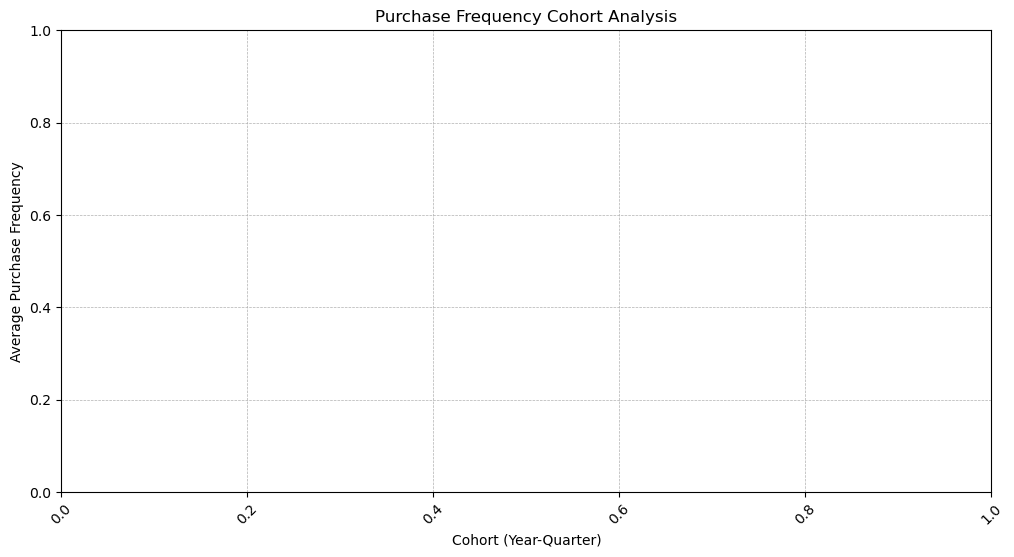

In [10]:
# Calculate purchase frequency for each user
user_freq = df.groupby('Mobile Key')['TotalTrsApplication'].count().reset_index()
user_freq.columns = ['Mobile Key', 'PurchaseFrequency']

# Merge purchase frequency back to main dataframe
df = pd.merge(df, user_freq, on='Mobile Key')

# Calculate average purchase frequency for each cohort
freq_cohort = df.groupby('FirstPurchaseCohort')['PurchaseFrequency'].mean().reset_index()

# Print to verify purchase frequency cohort analysis
print(freq_cohort)

# Plot the purchase frequency cohort analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=freq_cohort, x='FirstPurchaseCohort', y='PurchaseFrequency', marker='o')
plt.title('Purchase Frequency Cohort Analysis')
plt.xlabel('Cohort (Year-Quarter)')
plt.ylabel('Average Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


       FirstTrsDate_Gregorian LastTrsDate_Gregorian FirstAppInstallDate  \
0                         NaT                   NaT          2017-04-18   
1                         NaT                   NaT          2017-04-18   
2                         NaT                   NaT          2017-04-18   
3                         NaT                   NaT          2017-04-18   
4                         NaT                   NaT          2017-04-18   
...                       ...                   ...                 ...   
132229                    NaT                   NaT          2018-07-06   
132230                    NaT                   NaT          2018-07-06   
132231                    NaT                   NaT          2021-09-04   
132232                    NaT                   NaT          2016-08-02   
132233                    NaT                   NaT          2017-12-23   

       CohortYear CohortQuarter  
0            2017        2017Q2  
1            2017        2017Q2

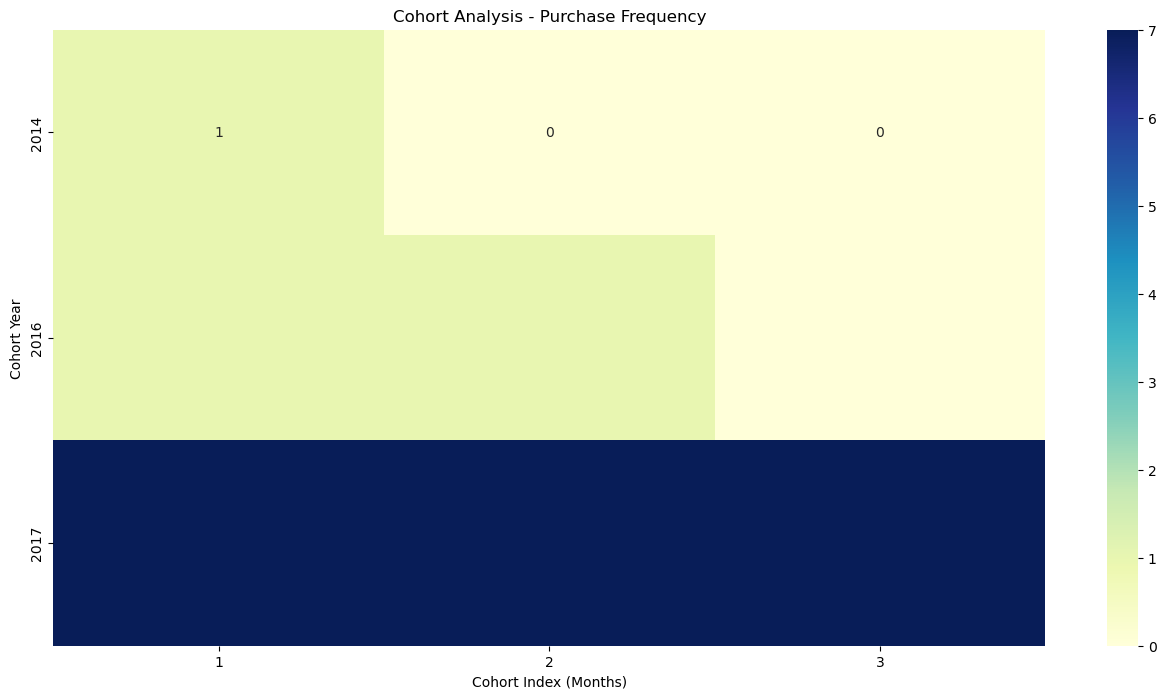

In [17]:
# Convert FirstTrsDate & LastTrsDate to universal dates
def convert_to_gregorian(date_float):
    try:
        date_str = str(int(date_float)).zfill(8)  # Ensure the string is 8 characters long
        year = int(date_str[:4])
        month = int(date_str[4:6])
        day = int(date_str[6:8])
        gregorian_date = datetime(year, month, day)
        return gregorian_date.strftime('%d-%m-%Y')
    except ValueError as e:
        return None

# Convert Hijri dates to Gregorian dates
df['FirstTrsDate_Gregorian'] = df['FirstTrsDate'].apply(convert_to_gregorian)
df['LastTrsDate_Gregorian'] = df['LastTrsDate'].apply(convert_to_gregorian)

# Convert to datetime format
df['FirstTrsDate_Gregorian'] = pd.to_datetime(df['FirstTrsDate_Gregorian'], format='%d-%m-%Y', errors='coerce')
df['LastTrsDate_Gregorian'] = pd.to_datetime(df['LastTrsDate_Gregorian'], format='%d-%m-%Y', errors='coerce')

# Remove hours from FirstAppInstallDate and convert to date
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate']).dt.date

# Extract year and quarter for cohort analysis
df['CohortYear'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Y')
df['CohortQuarter'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Q')

# Print to verify preprocessing
print(df[['FirstTrsDate_Gregorian', 'LastTrsDate_Gregorian', 'FirstAppInstallDate', 'CohortYear', 'CohortQuarter']])

# Sample transaction data for purchase frequency analysis
transaction_data = {
    'Mobile Key': [2, 2, 2, 4, 6, 6],
    'TransactionDate': ['2017-04-20', '2017-05-18', '2017-06-18', '2014-12-20', '2016-04-20', '2016-05-20'],
    'Amount': [100, 150, 200, 50, 75, 125]
}
transactions_df = pd.DataFrame(transaction_data)

# Convert TransactionDate to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge with the main dataframe to get cohort information
merged_df = pd.merge(transactions_df, df, on='Mobile Key')

# Calculate the cohort index
merged_df['CohortIndex'] = (merged_df['TransactionDate'].dt.to_period('M') - merged_df['FirstAppInstallDate'].apply(lambda x: pd.Period(x, freq='M'))).apply(lambda x: x.n + 1)

# Group by CohortYear, CohortIndex and count the number of transactions
cohort_data = merged_df.groupby(['CohortYear', 'CohortIndex']).size().unstack(fill_value=0)

print(cohort_data)

# Visualize the cohort analysis
plt.figure(figsize=(16, 8))
sns.heatmap(cohort_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cohort Analysis - Purchase Frequency')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Year')
plt.show()


In [ ]:
# Select the feature columns for analysis
feature_columns = ['CountBalance', 'CountPichak', 'CountCharge', 'CountInternet', 'CountBill', 'CountETC',
                   'CountCarFinesInq', 'CountTraffic', 'CountDFlight', 'CountIntFlight', 'CountTrain', 'CountBus']

# Calculate metrics for each cohort
feature_cohort_data = df.groupby('CohortQuarter')[feature_columns].sum()

# Plot Feature Counts for each cohort
plt.figure(figsize=(14, 10))
for feature in feature_columns:
    sns.lineplot(data=feature_cohort_data, x=feature_cohort_data.index.astype(str), y=feature_cohort_data[feature], marker='o', label=feature)

plt.title('Feature Cohort Analysis')
plt.xlabel('Cohort (Year-Quarter)')
plt.ylabel('Feature Counts')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Customize x-axis to show quarters and years
x_labels = [f'{cohort.quarter}Q\n{cohort.year}' for cohort in feature_cohort_data.index]
plt.xticks(range(len(x_labels)), x_labels)

plt.show()


In [ ]:
# Select the feature columns for analysis
feature_columns = ['CountBalance', 'CountCharge', 'CountInternet', 'CountBill']

# Calculate metrics for each cohort
feature_cohort_data = df.groupby('CohortQuarter')[feature_columns].sum()

# Plot Feature Counts for each cohort
plt.figure(figsize=(14, 10))
for feature in feature_columns:
    sns.lineplot(data=feature_cohort_data, x=feature_cohort_data.index.astype(str), y=feature_cohort_data[feature], marker='o', label=feature)

plt.title('Feature Cohort Analysis')
plt.xlabel('Cohort (Year-Quarter)')
plt.ylabel('Feature Counts')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Customize x-axis to show quarters and years
x_labels = [f'{cohort.quarter}Q\n{cohort.year}' for cohort in feature_cohort_data.index]
plt.xticks(range(len(x_labels)), x_labels)

plt.show()


In [ ]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of columns to check for outliers
numeric_columns = [
    'TotalAmount', 'TotalTrsApplication', 'TotalTrsPos', 'TotalAmountPos',
    'AmountC2C', 'CountC2C', 'AmountCharge', 'CountCharge',
    'AmountInternet', 'CountInternet', 'AmountBill', 'CountBill',
    'AmountETC', 'CountETC', 'AmountCarFinesInq', 'CountCarFinesInq',
    'AmountTraffic', 'CountTraffic', 'AmountDFlight', 'CountDFlight',
    'AmountIntFlight', 'CountIntFlight', 'AmountTrain', 'CountTrain',
    'AmountBus', 'CountBus'
]

# Identify and print outliers for each numeric column
outliers_dict = {}
for column in numeric_columns:
    outliers_dict[column] = identify_outliers(df, column)
    print(f"Outliers for {column}:\n", outliers_dict[column], "\n")

# Optional: To view outliers for a specific column, use:
print(outliers_dict['TotalAmount'])


In [ ]:
import matplotlib.pyplot as plt

def identify_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of columns to check for outliers
numeric_columns = [
    'TotalAmount', 'TotalTrsApplication', 'TotalTrsPos', 'TotalAmountPos',
    'AmountC2C', 'CountC2C', 'AmountCharge', 'CountCharge',
    'AmountInternet', 'CountInternet', 'AmountBill', 'CountBill',
    'AmountETC', 'CountETC', 'AmountCarFinesInq', 'CountCarFinesInq',
    'AmountTraffic', 'CountTraffic', 'AmountDFlight', 'CountDFlight',
    'AmountIntFlight', 'CountIntFlight', 'AmountTrain', 'CountTrain',
    'AmountBus', 'CountBus'
]

# Identify and plot outliers for each numeric column
for column in numeric_columns:
    outliers = identify_outliers(df, column)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column], label='Data Points')
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    plt.title(f'Outliers for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()


In [ ]:
# Convert FirstAppInstallDate to datetime and extract year and quarter
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate'])
df['FirstAppInstallYear'] = df['FirstAppInstallDate'].dt.year
df['FirstAppInstallQuarter'] = df['FirstAppInstallDate'].dt.quarter

# Display the modified dataframe
print(df[['FirstAppInstallDate', 'FirstAppInstallYear', 'FirstAppInstallQuarter']])

# Define a cohort of high-value users based on transactions and device information
high_value_cohort = df[
    (df['TotalTrsApplication'] > 10) &
    (df['SuccessfullRatio'] > 0.8) &
    (df['Mobile Application Download Source Title'].isin(['Google Play', 'Cafe Bazaar'])) &
    (df['FirstAppInstallYear'] > 2016)
]

# Display the high-value cohort
print(high_value_cohort)

In [ ]:
# Convert FirstAppInstallDate to datetime and extract year and quarter
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate'])
df['FirstAppInstallYear'] = df['FirstAppInstallDate'].dt.year
df['FirstAppInstallQuarter'] = df['FirstAppInstallDate'].dt.quarter

# Create a cohort identifier
df['Cohort'] = df['FirstAppInstallYear'].astype(str) + 'Q' + df['FirstAppInstallQuarter'].astype(str)

# Display the modified dataframe
print(df[['FirstAppInstallDate', 'FirstAppInstallYear', 'FirstAppInstallQuarter', 'Cohort']])

# Calculate metrics for each cohort
cohort_data = df.groupby('Cohort').agg({
    'TotalTrsApplication': 'sum',
    'TotalAmount': 'sum',
    'Mobile Number Encrypt': 'count'
}).rename(columns={'Mobile Number Encrypt': 'UserCount'})

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_data, x=cohort_data.index, y='TotalTrsApplication', marker='o', label='Total Transactions')
plt.title('Acquisition Cohort Analysis')
plt.xlabel('Cohort')
plt.ylabel('Count / Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_data, x=cohort_data.index, y='TotalAmount', marker='o', label='Total Amount')
plt.title('Acquisition Cohort Analysis')
plt.xlabel('Cohort')
plt.ylabel('Count / Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Extract year and month from Hijri dates
df['FirstTrsDate'] = df['FirstTrsDate'].apply(lambda x: str(x) if pd.notnull(x) else '')
df['LastTrsDate'] = df['LastTrsDate'].apply(lambda x: str(x) if pd.notnull(x) else '')

df['FirstTrsYear'] = df['FirstTrsDate'].apply(lambda x: int(x[:4]) if x else None)
df['FirstTrsMonth'] = df['FirstTrsDate'].apply(lambda x: int(x[4:6]) if x else None)
df['LastTrsYear'] = df['LastTrsDate'].apply(lambda x: int(x[:4]) if x else None)
df['LastTrsMonth'] = df['LastTrsDate'].apply(lambda x: int(x[4:6]) if x else None)

# Create a cohort identifier based on Hijri year and month
df['FirstTrsCohort'] = df['FirstTrsYear'].astype(str) + 'Q' + ((df['FirstTrsMonth']-1)//3 + 1).astype(str)
df['LastTrsCohort'] = df['LastTrsYear'].astype(str) + 'Q' + ((df['LastTrsMonth']-1)//3 + 1).astype(str)

# Select the feature columns for analysis
feature_columns = ['CountBalance', 'CountPichak', 'CountCharge', 'CountInternet', 'CountBill', 'CountETC',
                   'CountCarFinesInq', 'CountTraffic', 'CountDFlight', 'CountIntFlight', 'CountTrain', 'CountBus']

# Calculate metrics for each cohort
feature_cohort_data = df.groupby('FirstTrsCohort')[feature_columns].sum()

# Plot Feature Counts for each cohort
plt.figure(figsize=(14, 10))
for feature in feature_columns:
    sns.lineplot(data=feature_cohort_data, x=feature_cohort_data.index, y=feature_cohort_data[feature], marker='o', label=feature)

plt.title('Feature Cohort Analysis')
plt.xlabel('Cohort (Year-Quarter)')
plt.ylabel('Feature Counts')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Customize x-axis to show quarters and years
x_labels = [f'{cohort.split("Q")[1]}Q\n{cohort.split("Q")[0]}' for cohort in feature_cohort_data.index]
plt.xticks(range(len(x_labels)), x_labels)

plt.show()

In [ ]:
# Define function to convert Hijri date to Gregorian date
def convert_to_gregorian(hijri_date):
    if hijri_date and pd.notnull(hijri_date):
        year = int(hijri_date[:4])
        month = int(hijri_date[4:6])
        day = int(hijri_date[6:8])
        gregorian_date = convert.Hijri(year, month, day).to_gregorian()
        return f"{gregorian_date.year}-{gregorian_date.month:02d}-{gregorian_date.day:02d}"
    return None


# Convert Hijri dates to Gregorian dates
df['FirstTrsDate_Gregorian'] = df['FirstTrsDate'].apply(convert_to_gregorian)
df['LastTrsDate_Gregorian'] = df['LastTrsDate'].apply(convert_to_gregorian)

# Convert to datetime format
df['FirstTrsDate_Gregorian'] = pd.to_datetime(df['FirstTrsDate_Gregorian'], format='%Y-%m-%d', errors='coerce')
df['LastTrsDate_Gregorian'] = pd.to_datetime(df['LastTrsDate_Gregorian'], format='%Y-%m-%d', errors='coerce')

# Remove hours from FirstAppInstallDate and convert to date
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate']).dt.date

# Extract year and quarter for cohort analysis
df['CohortYear'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Y')
df['CohortQuarter'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Q')

# Select the feature columns for analysis
feature_columns = ['CountBalance', 'CountPichak', 'CountCharge', 'CountInternet', 'CountBill', 'CountETC',
                   'CountCarFinesInq', 'CountTraffic', 'CountDFlight', 'CountIntFlight', 'CountTrain', 'CountBus']

# Calculate metrics for each cohort
feature_cohort_data = df.groupby('CohortQuarter')[feature_columns].sum()

# Plot Feature Counts for each cohort
plt.figure(figsize=(14, 10))
for feature in feature_columns:
    sns.lineplot(data=feature_cohort_data, x=feature_cohort_data.index.astype(str), y=feature_cohort_data[feature], marker='o', label=feature)

plt.title('Feature Cohort Analysis')
plt.xlabel('Cohort (Year-Quarter)')
plt.ylabel('Feature Counts')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Customize x-axis to show quarters and years
x_labels = [f'{cohort.quarter}Q\n{cohort.year}' for cohort in feature_cohort_data.index]
plt.xticks(range(len(x_labels)), x_labels)

plt.show()

In [ ]:
# Convert FirstTrsDate & LastTrsDate to universal dates

def convert_to_gregorian(date_float):
    try:
        # Convert the float to a string and extract the date components
        date_str = str(int(date_float)).zfill(8)  # Ensure the string is 8 characters long
        year = int(date_str[:4])
        month = int(date_str[4:6])
        day = int(date_str[6:8])
        
        # Attempt to create a datetime object
        gregorian_date = datetime(year, month, day)
        
        # Return the formatted date
        return gregorian_date.strftime('%d-%m-%Y')
    except ValueError as e:
        # Handle the error
        return 0


# Use function for df
df['FirstTrsDate_Gregorian'] = df['FirstTrsDate'].apply(convert_to_gregorian)
df['LastTrsDate_Gregorian'] = df['LastTrsDate'].apply(convert_to_gregorian)

df.head()

In [ ]:
# Convert dates to datetime
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate'])

# Extract year and quarter for cohort analysis
df['CohortYear'] = df['FirstAppInstallDate'].dt.to_period('Y')
df['CohortQuarter'] = df['FirstAppInstallDate'].dt.to_period('Q')

# Split ServiceUsage into individual services
df = df.assign(ServiceUsage=df['ServiceUsage'].str.split(',')).explode('ServiceUsage')
df['ServiceUsage'] = df['ServiceUsage'].str.strip()

In [ ]:
def cohort_analysis_time_based(df, cohort_column):
    cohort_counts = df.pivot_table(
        index=cohort_column,
        columns='FirstTrsDate_Gregorian',
        values='Mobile Key',
        aggfunc='count'
    ).fillna(0)

    cohort_sizes = cohort_counts.iloc[:, 0]
    retention = cohort_counts.divide(cohort_sizes, axis=0)

    plt.figure(figsize=(12, 8))
    plt.title(f'Cohort Analysis - User Retention by {cohort_column}')
    sns.heatmap(data=retention, annot=True, fmt='.0%', cmap='Blues')
    plt.show()

    return cohort_counts, retention

# Cohort analysis by Year
year_counts, year_retention = cohort_analysis_time_based(df, 'CohortYear')
print("Cohort Counts by Year:\n", year_counts)
print("\nRetention by Year:\n", year_retention)

# Cohort analysis by Quarter
quarter_counts, quarter_retention = cohort_analysis_time_based(df, 'CohortQuarter')
print("Cohort Counts by Quarter:\n", quarter_counts)
print("\nRetention by Quarter:\n", quarter_retention)


In [ ]:
def revenue_analysis_time_based(df, cohort_column):
    revenue_cohort = df.pivot_table(
        index=cohort_column,
        columns='FirstTrsDate_Gregorian',
        values='TotalAmount',
        aggfunc='sum'
    ).fillna(0)

    plt.figure(figsize=(12, 8))
    plt.title(f'Cohort Analysis - Revenue by {cohort_column}')
    sns.heatmap(data=revenue_cohort, annot=True, fmt='.0f', cmap='Oranges')
    plt.show()

    return revenue_cohort

# Revenue analysis by Year
year_revenue = revenue_analysis_time_based(df, 'CohortYear')
print("Revenue by Year:\n", year_revenue)

# Revenue analysis by Quarter
quarter_revenue = revenue_analysis_time_based(df, 'CohortQuarter')
print("Revenue by Quarter:\n", quarter_revenue)


In [ ]:
def cohort_analysis_time_based(df, cohort_column):
    cohort_counts = df.pivot_table(
        index=cohort_column,
        columns='FirstTrsDate_Gregorian',
        values='Mobile Key',
        aggfunc='count'
    ).fillna(0)

    cohort_sizes = cohort_counts.iloc[:, 0]
    retention = cohort_counts.divide(cohort_sizes, axis=0)

    plt.figure(figsize=(12, 8))
    plt.title(f'Cohort Analysis - User Retention by {cohort_column}')
    sns.heatmap(data=retention, annot=True, fmt='.0%', cmap='Blues')
    plt.show()

    return cohort_counts, retention

# Cohort analysis by Year
year_counts, year_retention = cohort_analysis_time_based(df, 'CohortYear')
print("Cohort Counts by Year:\n", year_counts)
print("\nRetention by Year:\n", year_retention)

# Cohort analysis by Quarter
quarter_counts, quarter_retention = cohort_analysis_time_based(df, 'CohortQuarter')
print("Cohort Counts by Quarter:\n", quarter_counts)
print("\nRetention by Quarter:\n", quarter_retention)


In [ ]:
# Convert dates to datetime
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate'])
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Function to extract service types
def extract_service_types(service_usage):
    # Split by comma and strip whitespace
    services = [service.strip() for service in service_usage.split(',')]
    return services

# Apply the function to the ServiceUsage column
df['ServiceType'] = df['ServiceUsage'].apply(extract_service_types)

# Create a cohort identifier based on the service type and province
df['ServiceCohort'] = df['ServiceType']
df['ProvinceCohort'] = df['FirstProvince']

def cohort_analysis(df, cohort_column):
    # Calculate cohort counts for user retention
    cohort_counts = df.pivot_table(
        index=cohort_column,
        columns='FirstTrsDate',
        values='Mobile Key',
        aggfunc='count'
    ).fillna(0)

    # Calculate retention rates
    cohort_sizes = cohort_counts.iloc[:, 0]
    retention = cohort_counts.divide(cohort_sizes, axis=0)

    plt.figure(figsize=(12, 8))
    plt.title(f'Cohort Analysis - User Retention by {cohort_column}')
    sns.heatmap(data=retention, annot=True, fmt='.0%', cmap='Blues')
    plt.show()

    return cohort_counts, retention

# Cohort analysis by Service Type
service_counts, service_retention = cohort_analysis(df, 'ServiceCohort')
print("Cohort Counts by Service Type:\n", service_counts)
print("\nRetention by Service Type:\n", service_retention)


In [ ]:
# Split comma-separated values and expand to DataFrame
exploded = df['UserOwnedBanks'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['bank', 'count']

# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Reshape and reorder the text for proper display
top_10_counts['bank'] = top_10_counts['bank'].apply(lambda x: get_display(arabic_reshaper.reshape(x.strip())))

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['bank'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.title('Top 10 Banks by Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Split comma-separated values and expand to DataFrame
exploded = df['BankswithTrs'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['bank', 'count']

# Remove leading and trailing whitespace characters from the bank names
value_counts['bank'] = value_counts['bank'].str.strip()

# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Use bidi and arabic_reshaper for proper display
top_10_counts['bank'] = top_10_counts['bank'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['bank'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.title('Top 10 Banks by Transaction Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Customer Lifetime Value (CLV)
df['CLV'] = df['TotalAmount']

# Calculate Customer Acquisition Cost (CAC)
df['CAC'] = 0
df.loc[df['TotalTrsApplication'] > 0, 'CAC'] = df['TotalAmount'] / df['TotalTrsApplication']

# Calculate Return on Investment (ROI)
df['ROI'] = (df['TotalAmount'] - df['CAC']) / df['CAC']

# Calculate Conversion Rate (Signup)
df['ConversionRateSignup'] = df['TotalTrsApplication'] / df['TotalTrsApplication'].sum()

# Calculate Conversion Rate (Purchase)
df['ConversionRatePurchase'] = df['CountC2C'] / df['TotalTrsApplication']

# Display the updated DataFrame with calculated metrics
df.head()


In [ ]:
# Convert date columns to datetime
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# Customer Lifetime Value (CLV)
# Calculate average monetary value and average customer lifespan (in days)
df['Customer_Lifespan'] = (df['LastTrsDate'] - df['FirstTrsDate']).dt.days
average_monetary_value = df['TotalAmountPos'].mean() / 1_000_000  # Convert to rials
average_customer_lifespan = df['Customer_Lifespan'].mean()

# Assuming a customer generates revenue regularly over their lifespan
CLV = average_monetary_value * (average_customer_lifespan / 365)  # Annualize the lifespan

# Customer Acquisition Cost (CAC)
# Assume fixed marketing and advertising costs in rials
total_marketing_cost = 1_000_000_000  # Example cost in rials
total_customers_acquired = len(df)
CAC = total_marketing_cost / total_customers_acquired

# Return on Investment (ROI)
total_revenue = df['TotalAmountPos'].sum()
total_cost = total_marketing_cost + df['TotalAmountPos'].sum() * (1 - 0.09)  # Adding cost of providing service assuming 9% profit margin
ROI = (total_revenue - total_cost) / total_cost * 100

# Conversion Rate (CR)
# Assume some steps in a funnel: visits, sign-ups, purchases
total_visits = 10000  # Example number of visits
total_signups = total_customers_acquired  # Assuming every customer signed up
total_purchases = len(df)  # Assuming every customer made a purchase

CR_signup = total_signups / total_visits * 100
CR_purchase = total_purchases / total_signups * 100

# Net Promoter Score (NPS)
# Assume some sample data for promoter, passive, and detractor responses
promoters = 70  # Example number of promoters
passives = 20  # Example number of passives
detractors = 10  # Example number of detractors

NPS = (promoters - detractors) / (promoters + passives + detractors) * 100

# Display the results
print(f"Customer Lifetime Value (CLV): {CLV:.2f} rials")
print(f"Customer Acquisition Cost (CAC): {CAC:.2f} rials")
print(f"Return on Investment (ROI): {ROI:.2f}%")
print(f"Conversion Rate (Signup): {CR_signup:.2f}%")
print(f"Conversion Rate (Purchase): {CR_purchase:.2f}%")
print(f"Net Promoter Score (NPS): {NPS:.2f}")

In [ ]:
import pandas as pd

# Load the provided DataFrame
data = {
    'Mobile Key': [2, 4, 6, 7],
    'TotalAmount': [8131250, 900000, 0, 1692912990],
    'Total Trs Application': [18, 0, 0, 290],
    'TotalAmountPos': [14020326, 0, 0, 1671507000],
    'SuccessfullRatio': [0.9, 0, 0, 0.90625]
}

df = pd.DataFrame(data)

# Calculate CLV
total_revenue = df['TotalAmount'].sum()
total_customers = len(df)
clv = total_revenue / total_customers

# Calculate CAC
total_acquisition_cost = 1000000  # Assuming a total acquisition cost of 1,000,000 rials
new_customers = len(df[df['Total Trs Application'] > 0])  # Assuming a new customer is one with at least one transaction
cac = total_acquisition_cost / new_customers

# Calculate ROI
net_profit = total_revenue * df['SuccessfullRatio'].mean()
cost_of_investment = total_acquisition_cost
roi = (net_profit / cost_of_investment) * 100

# Calculate Conversion Rate (Signup)
total_signups = len(df)
total_visitors = 1000  # Assuming 1000 total visitors
conversion_rate_signup = (total_signups / total_visitors) * 100

# Calculate Conversion Rate (Purchase)
total_purchases = len(df[df['TotalAmountPos'] > 0])  # Assuming a purchase is a successful transaction
conversion_rate_purchase = (total_purchases / total_signups) * 100

# Calculate NPS
promoters = len(df[df['SuccessfullRatio'] >= 0.9])
detractors = len(df[df['SuccessfullRatio'] < 0.7])
nps = (promoters / total_customers - detractors / total_customers) * 100

# Display the calculated metrics
print(f"Customer Lifetime Value (CLV): {clv} rials")
print(f"Customer Acquisition Cost (CAC): {cac} rials")
print(f"Return on Investment (ROI): {roi}%")
print(f"Conversion Rate (Signup): {conversion_rate_signup}%")
print(f"Conversion Rate (Purchase): {conversion_rate_purchase}%")
print(f"Net Promoter Score (NPS): {nps}")


In [ ]:
# Convert date columns to datetime
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Calculate Frequency (total number of transactions)
frequency_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

df['Frequency'] = df[frequency_columns].sum(axis=1)

# Calculate Monetary (total amount spent)
monetary_columns = [
    'TotalAmountPos', 'AmountC2C', 'CMS_Balance', 'AmountCharge',
    'AmountInternet', 'AmountBill', 'AmountETC', 'AmountCarFinesInq', 'AmountTraffic',
    'AmountDFlight', 'AmountTrain', 'AmountBus', 'AmountC2CasDest'
]

df['Monetary'] = df[monetary_columns].sum(axis=1)

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# RFM Segmentation
quantiles = df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

def rfm_segmentation(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

df['R'] = df['Recency'].apply(rfm_segmentation, args=('Recency', quantiles))
df['F'] = df['Frequency'].apply(rfm_segmentation, args=('Frequency', quantiles))
df['M'] = df['Monetary'].apply(rfm_segmentation, args=('Monetary', quantiles))

# RFM Score
df['RFM_Score'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

# User Segments
def user_segment(row):
    if row['Churn']:
        return 'Churned'
    elif row['RFM_Score'] == '111':
        return 'Best Customers'
    elif row['R'] == 1 and row['F'] == 1:
        return 'Loyal Customers'
    elif row['R'] == 4:
        return 'At Risk'
    elif row['F'] == 4:
        return 'High Frequency'
    elif row['M'] == 4:
        return 'Big Spenders'
    else:
        return 'Others'

df['Segment'] = df.apply(user_segment, axis=1)

# Services interaction
services_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

# Calculate least and most interacted services
df['Least_Interacted_Service'] = df[services_columns].idxmin(axis=1)
df['Most_Interacted_Service'] = df[services_columns].idxmax(axis=1)

# Display the segments
segments_summary = df['Segment'].value_counts()
print("User Segments Summary:\n", segments_summary)


# Visualization of Segments
plt.figure(figsize=(10, 6))
segments_summary.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('User Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, v in enumerate(segments_summary):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Explanation of Segments and Their Usage:
explanations = {
    'Best Customers': "These users have high recency, frequency, and monetary scores. They are the most valuable customers.",
    'Loyal Customers': "These users have high recency and frequency scores but not necessarily high monetary scores. They are loyal and frequently use the app.",
    'At Risk': "These users have low recency scores, meaning they haven't transacted recently and are at risk of churning.",
    'High Frequency': "These users have high frequency scores, indicating they transact often but may not spend much per transaction.",
    'Big Spenders': "These users have high monetary scores, indicating they spend a lot per transaction.",
    'Churned': "These users have not transacted in the last 30 days and are considered churned.",
    'Others': "These users do not fit into any of the above categories and have mixed scores."
}

print("\nExplanation of Segments and Their Usage:\n")
for segment, explanation in explanations.items():
    print(f"{segment}: {explanation}\n")


In [ ]:
df[['Mobile Key', 'Frequency', 'Monetary', 'RFM_Score', 'Segment', 'Least_Interacted_Service', 'Most_Interacted_Service']]

In [ ]:
# Calculate potential profit for each least interacted service
profit_margin = 0.09

# Get unique least interacted services, excluding NaN values
unique_services = df['Least_Interacted_Service'].dropna().unique()

# Initialize an empty DataFrame to store discount suggestions
discount_suggestions = pd.DataFrame(columns=['Service', 'Potential_Profit', 'Suggested_Discount'])

# Calculate the potential profit if a user starts using the least interacted service
for service in unique_services:
    users = df[df['Least_Interacted_Service'] == service]
    if service in users.columns:
        potential_profit = users[service].sum() * profit_margin
        # Assume a discount that gives the company 5% profit margin on these services instead of 9%
        suggested_discount = (potential_profit / users.shape[0]) * (4/9)  # Discount to reduce profit margin from 9% to 5%
        new_row = pd.DataFrame({
            'Service': [service],
            'Potential_Profit': [potential_profit],
            'Suggested_Discount': [suggested_discount]
        })
        discount_suggestions = pd.concat([discount_suggestions, new_row], ignore_index=True)

# Display the discount suggestions
print("Discount Suggestions for Least Interacted Services:\n", discount_suggestions)

In [ ]:
# Convert date columns to datetime
df['FirstTrsDate'] = pd.to_datetime(df['FirstTrsDate'])
df['LastTrsDate'] = pd.to_datetime(df['LastTrsDate'])

# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Calculate Frequency (total number of transactions)
frequency_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

df['Frequency'] = df[frequency_columns].sum(axis=1)

# Calculate Monetary (total amount spent)
monetary_columns = [
    'TotalAmountPos', 'AmountC2C', 'CMS_Balance', 'AmountCharge',
    'AmountInternet', 'AmountBill', 'AmountETC', 'AmountCarFinesInq', 'AmountTraffic',
    'AmountDFlight', 'AmountTrain', 'AmountBus', 'AmountC2CasDest'
]

df['Monetary'] = df[monetary_columns].sum(axis=1)

# Calculate days active for each user
df['Days_Active'] = (df['LastTrsDate'] - df['FirstTrsDate']).dt.days + 1

# Define churn: Recency > 90 days
churn_threshold = 90
df['Churn'] = df['Recency'] > churn_threshold

# Calculate average value of users (Monetary)
average_value_of_users = df['Monetary'].mean()
print(f"Average Value of Users: {average_value_of_users:.2f} - This is the average amount spent by each user.")

# Calculate average value (Monetary)
average_value = df['Monetary'].mean()
print(f"Average Value: {average_value:.2f} - This is the same as the average value of users.")

# Calculate user share
total_users = len(df)
total_active_users = df[~df['Churn']].shape[0]
user_share = total_active_users / total_users * 100
print(f"User Share: {user_share:.2f}% - Percentage of active users (users who are not churned).")

# Calculate income (profit) share - Assuming 'profit' is 'Monetary'
total_income = df['Monetary'].sum()
income_share = total_income / total_income * 100  # Always 100% if calculating share of total income
print(f"Income (Profit) Share: {income_share:.2f}% - This is the share of total income, which is always 100%.")

# Calculate average use of the app (total transactions)
average_use_app = df['Frequency'].mean()
print(f"Average Use of App: {average_use_app:.2f} - Average number of transactions per user.")

# Calculate average use of the app per day (frequency)
df['Frequency_Per_Day'] = df['Frequency'] / df['Days_Active']
average_use_app_per_day = df['Frequency_Per_Day'].mean()
print(f"Average Use of App per Day: {average_use_app_per_day:.2f} - Average number of transactions per user per day.")

# Calculate average user use of the app
average_user_use_app = df['Frequency'].mean()
print(f"Average User Use of App: {average_user_use_app:.2f} - Same as the average use of app.")

# Calculate churn rate
churn_rate = df['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}% - Percentage of users who have not used the app in the last {churn_threshold} days.")

In [ ]:
# Set current_date to the last date in the dataset
current_date = df['LastTrsDate'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate']).dt.days

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# Calculate churn rate
churn_rate = df['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}% - Percentage of users who have not used the app in the last {churn_threshold} days.")

In [ ]:
# List of columns for comparison
transaction_types = {
    'Pos': ['TotalTrsPos', 'TotalAmountPos'],
    'C2C': ['CountC2C', 'AmountC2C'],
    'Balance': ['CountBalance', 'CMS_Balance'],
    'Pichak': ['CountPichak', 'TotalAmountPichak'],
    'Charge': ['CountCharge', 'AmountCharge'],
    'Internet': ['CountInternet', 'AmountInternet'],
    'Bill': ['CountBill', 'AmountBill'],
    'ETC': ['CountETC', 'AmountETC'],
    'CarFinesInq': ['CountCarFinesInq', 'AmountCarFinesInq'],
    'Traffic': ['CountTraffic', 'AmountTraffic'],
    'Flight': ['CountDFlight', 'AmountDFlight'],
    'Train': ['CountTrain', 'AmountTrain'],
    'Bus': ['CountBus', 'AmountBus'],
    'DestCardC2C': ['CountDestCardC2C', 'AmountC2CasDest']
}

# Aggregate data
summary = {
    'Transaction Type': [],
    'Total Amount': [],
    'Total Count': []
}

for transaction, columns in transaction_types.items():
    count_col, amount_col = columns
    if count_col in df.columns and amount_col in df.columns:
        summary['Transaction Type'].append(transaction)
        summary['Total Amount'].append(df[amount_col].sum())
        summary['Total Count'].append(df[count_col].sum())

summary_df = pd.DataFrame(summary)

# Order by total amount
summary_df = summary_df.sort_values(by='Total Amount', ascending=False)

# Plot 1: Bar plot for Total Amount
plt.figure(figsize=(14, 8))
plt.bar(summary_df['Transaction Type'], summary_df['Total Amount'], color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Transaction Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Combined Bar and Line plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total amount
color = 'tab:blue'
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Total Amount', color=color)
ax1.bar(summary_df['Transaction Type'], summary_df['Total Amount'], color=color, alpha=0.6, label='Total Amount')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis to plot total count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Count', color=color)
ax2.plot(summary_df['Transaction Type'], summary_df['Total Count'], color=color, marker='o', linestyle='-', linewidth=2, label='Total Count')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of Transaction Types by Total Amount and Total Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Exclude 'C2C' and plot again
summary_df_excl_c2c = summary_df[summary_df['Transaction Type'] != 'C2C']

# Plot 3: Bar plot for Total Amount excluding C2C
plt.figure(figsize=(14, 8))
plt.bar(summary_df_excl_c2c['Transaction Type'], summary_df_excl_c2c['Total Amount'], color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Transaction Type (excluding C2C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 4: Combined Bar and Line plot excluding C2C
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total amount
color = 'tab:blue'
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Total Amount', color=color)
ax1.bar(summary_df_excl_c2c['Transaction Type'], summary_df_excl_c2c['Total Amount'], color=color, alpha=0.6, label='Total Amount')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis to plot total count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Count', color=color)
ax2.plot(summary_df_excl_c2c['Transaction Type'], summary_df_excl_c2c['Total Count'], color=color, marker='o', linestyle='-', linewidth=2, label='Total Count')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of Transaction Types by Total Amount and Total Count (excluding C2C)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Filter data for Mobile Operator Id 1 and 2
df_filtered = df[df['Mobile Operator Id'].isin([1, 2])]

# Get the top 6 application download source
top_6_downloads = (df_filtered['Mobile Application Download Source Title']
                    .dropna()
                    .value_counts()
                    .head(6))

# Create the first chart
plt.figure(figsize=(10, 6))
bars = top_6_downloads.plot(kind='bar', color='royalblue')

# Remove grid lines and y-axis labels
plt.grid(axis='y', linestyle='none', which='both', markevery=None)
plt.ylabel('')
plt.yticks([])  # Remove y-axis numbers

# Annotate bar values inside the bars
for bar in bars.patches:
    bar.set_height(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, int(bar.get_height()), ha='center', va='bottom', fontsize=11)

# Set x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mobile Application Download Source Title')
plt.title('Top 6 Mobile Application Download Sources')

plt.tight_layout()
plt.show()

In [ ]:
# Split comma-separated values and expand to DataFrame
exploded = df['TopService'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['Services', 'count']


# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['Services'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Services')
plt.title('Top 10 Services')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Split comma-separated values and expand to DataFrame
exploded = df['TopServiceExC2C'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['Services', 'count']


# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['Services'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Services')
plt.title('Top 10 Services Except C2C')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Split comma-separated values and expand to DataFrame
exploded = df['UserOwnedBanks'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['bank', 'count']


# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['bank'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.title('Top 10 Banks by Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Mobile Application Download Source Title
source_counts = df['Mobile Application Download Source Title'].value_counts()
top_5_sources = source_counts.head(5)
other_count = source_counts[5:].sum()

# Use pd.concat to combine Series
source_counts = pd.concat([top_5_sources, pd.Series({'Others': other_count})])

plt.figure(figsize=(8, 6))
plt.pie(source_counts, labels=source_counts.index, autopct="%1.1f%%")
plt.title("Mobile Application Download Source Title Distribution (Top 5 + Others)")
plt.show()

# 2. Mobile Operator Id (Exact Count)
operator_counts = df['Mobile Operator Id'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(operator_counts, labels=operator_counts.index, autopct="%1.1f%%")
plt.title("Mobile Operator Id Distribution")
plt.show()

# 3. Mobile Device OS Title (Count)
os_counts = df['Mobile Device OS Title'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(os_counts, labels=os_counts.index, autopct="%1.1f%%")
plt.title("Mobile Device OS Title Distribution")
plt.show()
